<a href="https://colab.research.google.com/github/ayushs0911/Customer-Personality-Analysis/blob/main/Customer_personality_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Download

In [1]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d imakash3011/customer-personality-analysis

  0% 0.00/62.0k [00:00<?, ?B/s]
100% 62.0k/62.0k [00:00<00:00, 64.3MB/s]


In [2]:
!unzip /content/customer-personality-analysis.zip

Archive:  /content/customer-personality-analysis.zip
  inflating: marketing_campaign.csv  


Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.



To implement customer personality analysis using machine learning, you can follow these steps:

1. Data Collection: Gather customer data that includes information relevant to personality traits, such as demographics, psychographics, purchase history, social media activity, customer feedback, and any other relevant data sources.

2. Data Preprocessing: Clean and preprocess the collected data by handling missing values, removing duplicates, and converting categorical variables into numerical representations suitable for machine learning algorithms.

3. Feature Selection/Extraction: Identify the most informative features for personality analysis. This can involve techniques such as correlation analysis, feature importance ranking, or dimensionality reduction methods like principal component analysis (PCA).

4. Labeling or Personality Trait Assessment: Assign personality labels or scores to each customer based on established personality frameworks such as the Big Five personality traits (Openness, Conscientiousness, Extraversion, Agreeableness, and Neuroticism) or other relevant personality models.

5. Model Selection: Choose an appropriate machine learning algorithm for personality prediction. This can include classification algorithms like logistic regression, decision trees, random forests, or even more advanced techniques like neural networks.

6. Model Training: Split the labeled data into training and validation sets. Train the selected machine learning model using the training data while tuning hyperparameters to optimize performance.

7. Model Evaluation: Evaluate the trained model's performance using appropriate evaluation metrics such as accuracy, precision, recall, or F1-score. Adjust the model if necessary to achieve satisfactory results.

8. Prediction and Product Modification: Apply the trained model to predict the personality traits of new or existing customers. Use these predictions to tailor product modifications, marketing strategies, or personalized recommendations based on the specific preferences and characteristics of different personality segments.

9. Iterative Improvement: Continuously gather feedback and collect new data to improve the model's accuracy and refine the customer personality analysis process. Regularly update and retrain the model to adapt to evolving customer preferences.

10. Privacy and Ethics: Ensure compliance with privacy regulations and ethical considerations by handling customer data responsibly and securely. Obtain proper consent and anonymize sensitive information as needed.

Implementing customer personality analysis using machine learning involves a combination of data collection, preprocessing, feature selection, model training, and prediction. The process should be iterative, continuously improving and refining the model's performance to provide valuable insights for product modification and customer segmentation strategies.

In [3]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [4]:
import scipy.stats as stats 

In [102]:
# sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
# pal = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
palette = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

In [6]:
data = pd.read_csv("/content/marketing_campaign.csv", sep = "\t")

In [7]:
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [8]:
print("No. of data points", len(data))

No. of data points 2240


#### According to the data description on Kaggle :

Data is categorised into following categories :
**Information about People :**
- ID 
- Year_Birth 
- Education 
- Marital_Status 
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise <br>

**Information about product**
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

**Promotion**
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last mont

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

- Dt_customer, which is a date doesn't have correct dtype. 
- Also some categorical values, which need to be converted to numerical values. 

In [10]:
data = data.drop(['Z_CostContact', 'Z_Revenue'], axis =1)

# Data Cleaning

<Axes: >

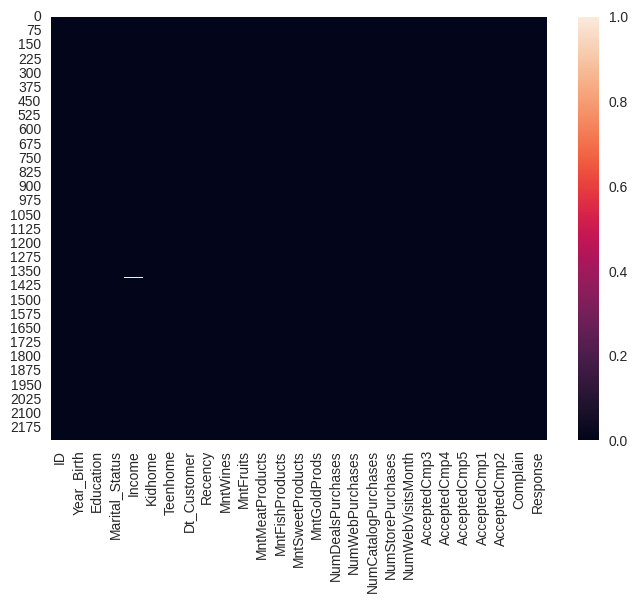

In [11]:
sns.heatmap(data.isnull())

**Missing value in `Income`**

In [12]:
# removing the NA values 
data = data.dropna()

In [13]:
len(data), data.isnull().sum()

(2216,
 ID                     0
 Year_Birth             0
 Education              0
 Marital_Status         0
 Income                 0
 Kidhome                0
 Teenhome               0
 Dt_Customer            0
 Recency                0
 MntWines               0
 MntFruits              0
 MntMeatProducts        0
 MntFishProducts        0
 MntSweetProducts       0
 MntGoldProds           0
 NumDealsPurchases      0
 NumWebPurchases        0
 NumCatalogPurchases    0
 NumStorePurchases      0
 NumWebVisitsMonth      0
 AcceptedCmp3           0
 AcceptedCmp4           0
 AcceptedCmp5           0
 AcceptedCmp1           0
 AcceptedCmp2           0
 Complain               0
 Response               0
 dtype: int64)

Now, Creating feature out of `Dt_Customer` that indicates number of days a customer is registered in the firm's database. 

In [14]:
data['Dt_Customer'] = pd.to_datetime(data["Dt_Customer"])

<ipython-input-14-add07dde3c05>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Dt_Customer'] = pd.to_datetime(data["Dt_Customer"])
<ipython-input-14-add07dde3c05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Dt_Customer'] = pd.to_datetime(data["Dt_Customer"])


In [15]:
dates = []
for i in data['Dt_Customer']:
  i = i.date()
  dates.append(i)

In [16]:
print("The newest customer's enrolment date in records : ", max(dates))
print("The oldest customer's enrolment date in records : ", min(dates))

The newest customer's enrolment date in records :  2014-12-06
The oldest customer's enrolment date in records :  2012-01-08


Creating a new feature, `Customer_for`, which means no.of days customers started to shop the store relative to the last record date. 

In [17]:
days = []
for i in dates:
  delta = max(dates) - i
  days.append(delta)
data["Customer_For"] = days 
data["Customer_For"] = pd.to_numeric(data['Customer_For'], errors = 'coerce')

Exploring the unique values in categorical values to get clear idea of data. 

<Axes: xlabel='Marital_Status', ylabel='count'>

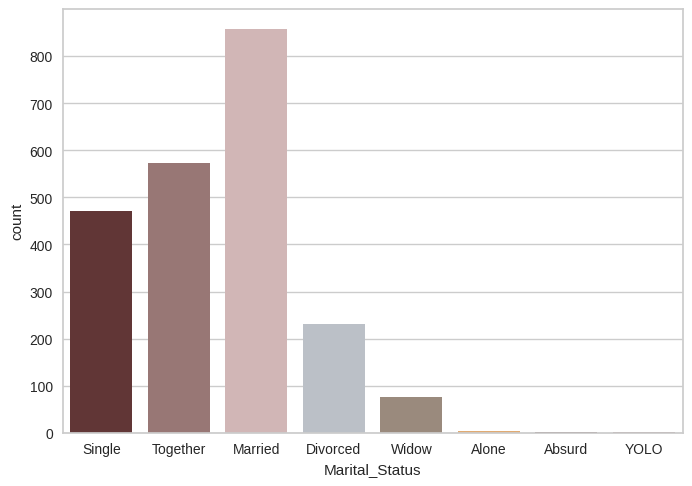

In [18]:
sns.countplot(data, x = 'Marital_Status' , palette = palette)

Most customers are married or are couple. 

<Axes: xlabel='Education', ylabel='count'>

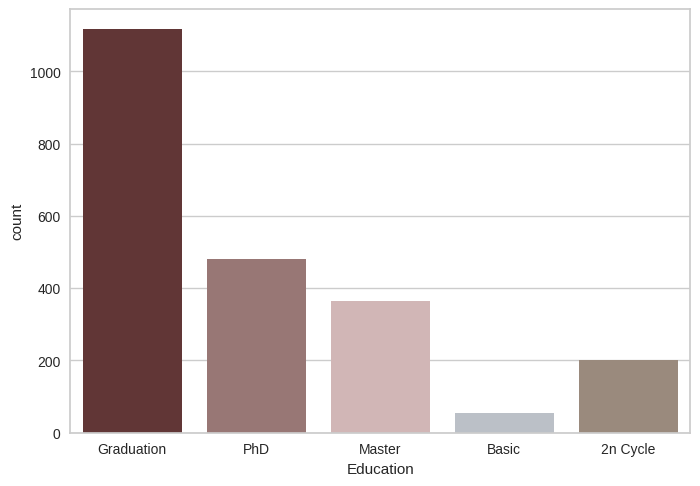

In [19]:
sns.countplot(data, x = 'Education' , palette = palette)

# Feature engineering 

In [20]:
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumStorePurchases  NumWebVisitsMonth  \
0  2012-04-09       58       635  ...                  4                  7   
1  2014-08-03       38        11  ...                  2                  5   
2  2013-08-21       26       426  ...                 10                  4   
3  2014-10-02       26        11  ...                  4                  6   
4  2014-01-19       94       173  ...                  6                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Response       Customer_For  
0         0         1  83894400000000000  
1         0         0  10800000000000000  
2         0         0  40780800000000000  
3         0         0   5616000000000000  
4         0         0  27734400000000000  

[5 rows x 28 columns]

#### Age 
Starting from 1st attribute `Year_Birth` we can extract age of the customers from this. 

In [21]:
data['Age'] = 2023 - data['Year_Birth']
data['Age'][:5]

0    66
1    69
2    58
3    39
4    42
Name: Age, dtype: int64

#### Total Spent by the customer 


In [22]:
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]
data['Spent'][:5]

0    1617
1      27
2     776
3      53
4     422
Name: Spent, dtype: int64

#### Reducinng living conditions to lesser category by dividing them in `Together` and `Single` attributes

In [23]:
data['Marital_Status'] = data['Marital_Status'].replace({"Married" : "Partner",
                                                         "Together" : "Partner",
                                                         "Absurd" : "Single",
                                                         "Widow" : "Single",
                                                         "YOLO" : "Single",
                                                         "Divorced" : "Single",
                                                         "Alone" : "Single"})

data['Marital_Status'].value_counts()

Partner    1430
Single      786
Name: Marital_Status, dtype: int64

#### Total children living in Household 

In [24]:
data['Children'] = data['Kidhome'] + data['Teenhome']
data['Children'][:5]

0    0
1    2
2    0
3    1
4    1
Name: Children, dtype: int64

#### Total people in the family

In [25]:
data['Family_Size'] = data['Marital_Status'].replace({"Single":1,"Partner" : 2})  
data['Family_Size'] = data['Family_Size'].astype(int) + data["Children"]

data['Family_Size'][:5]
                                                      

0    1
1    3
2    2
3    3
4    3
Name: Family_Size, dtype: int64

#### Feature pertaining parenthood 

In [26]:
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#### Segmenting education levels in 3 groups 


In [27]:
data['Education'] = data['Education'].replace({"Basic" : "UG",
                                              "2n Cycle" : "UG",
                                              "Graduation" : "Graduate",
                                              "Master" : "PG", 
                                              "PhD" : "PG"})
data['Education'].value_counts()


Graduate    1116
PG           846
UG           254
Name: Education, dtype: int64

# Data's Statistics 

In [28]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Customer_For', 'Age', 'Spent',
       'Children', 'Family_Size', 'Is_Parent'],
      dtype='object')

In [29]:
data.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2216.000000  2216.000000    2216.000000  2216.000000  2216.000000   
mean    5588.353339  1968.820397   52247.251354     0.441787     0.505415   
std     3249.376275    11.985554   25173.076661     0.536896     0.544181   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8421.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2216.000000  2216.000000  2216.000000      2216.000000   
mean     49.012635   305.091606    26.356047       166.995939   
std      28.948352   337.327920    39.793917       224.283273   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    24.000000     2.000000        16.000000   
50%      49.000000   174.500000     8.000000        68.000000   
75%      74.000000   505.000000    33.000000       232.250000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  AcceptedCmp1  AcceptedCmp2     Complain  \
count      2216.000000  ...   2216.000000   2216.000000  2216.000000   
mean         37.637635  ...      0.064079      0.013538     0.009477   
std          54.752082  ...      0.244950      0.115588     0.096907   
min           0.000000  ...      0.000000      0.000000     0.000000   
25%           3.000000  ...      0.000000      0.000000     0.000000   
50%          12.000000  ...      0.000000      0.000000     0.000000   
75%          50.000000  ...      0.000000      0.000000     0.000000   
max         259.000000  ...      1.000000      1.000000     1.000000   

          Response  Customer_For          Age        Spent     Children  \
count  2216.000000  2.216000e+03  2216.000000  2216.000000  2216.000000   
mean      0.150271  4.423735e+16    54.179603   607.075361     0.947202   
std       0.357417  2.008532e+16    11.985554   602.900476     0.749062   
min       0.000000  0.000000e+00    27.000000     5.000000     0.000000   
25%       0.000000  2.937600e+16    46.000000    69.000000     0.000000   
50%       0.000000  4.432320e+16    53.000000   396.500000     1.000000   
75%       0.000000  5.927040e+16    64.000000  1048.000000     1.000000   
max       1.000000  9.184320e+16   130.000000  2525.000000     3.000000   

       Family_Size    Is_Parent  
count  2216.000000  2216.000000  
mean      2.592509     0.714350  
std       0.905722     0.451825  
min       1.000000     0.000000  
25%       2.000000     0.000000  
50%       3.000000     1.000000  
75%       3.000000     1.000000  
max       5.000000     1.000000  

[8 rows x 30 columns]

By Statistics : We can see some outliers in `Customer_For`,`Income` and `Age`

In [30]:
def draw_plots(df, col):
  plt.figure(figsize= (10,5))
  plt.subplot(1,3,1)
  plt.hist(df[col], color= "#682F2F")

  plt.subplot(1,3,2)
  stats.probplot(df[col], dist = 'norm', plot = plt)

  plt.subplot(1,3,3)
  sns.boxplot(df[col], color= "#682F2F")
  plt.show()

Distribution plots for the feature Income are shown :


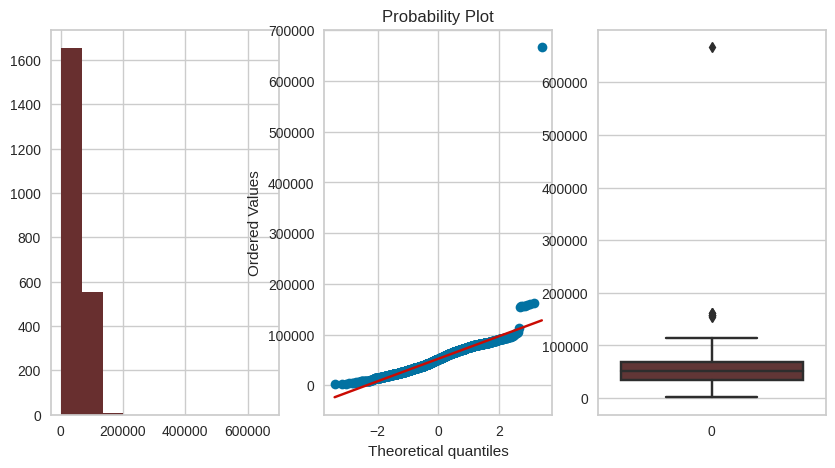

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Age are shown :


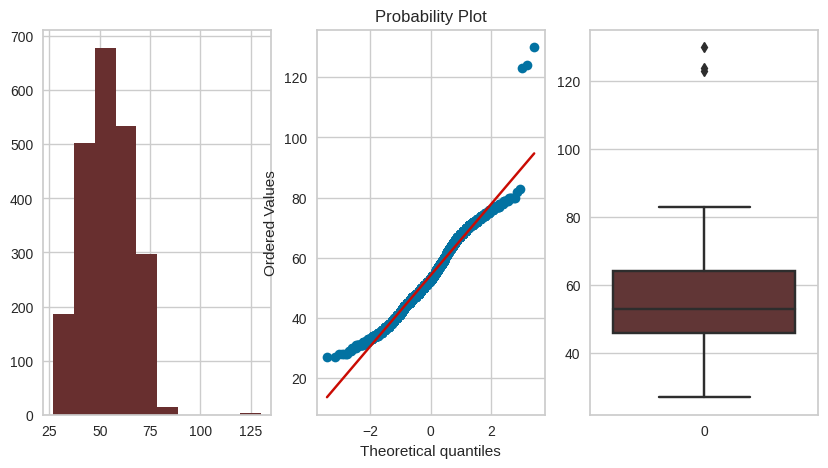

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Customer_For are shown :


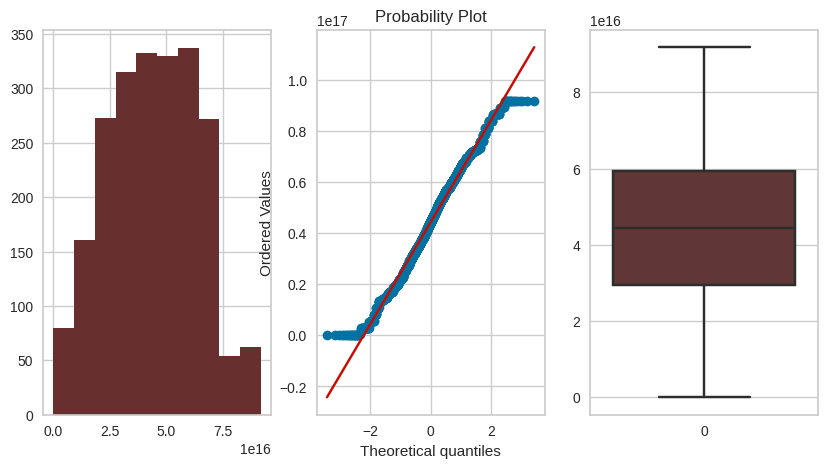

----------------------------------------------------------------------------------------------------


In [31]:
cols = ['Income', 'Age', 'Customer_For']
for i in range(len(cols)):
  print(f"Distribution plots for the feature {cols[i]} are shown :")
  draw_plots(data, cols[i])
  print("-"*100)

#### Feature : `Age` and `Income` have outliers

The upper and lower limits of a normal distribution can be determined using the standard deviation and mean of the distribution. In a standard normal distribution, where the mean is 0 and the standard deviation is 1, the common convention is to consider values within approximately 3 standard deviations from the mean as the "normal" range. 

To calculate the upper and lower limits for a normal distribution with a mean of 0 and a standard deviation of 1, we can multiply the standard deviation by 3 and add/subtract the result from the mean.

`Upper Limit: mean + (3 * standard deviation) = 0 + (3 * 1) = 3`

`Lower Limit: mean - (3 * standard deviation) = 0 - (3 * 1) = -3`

Therefore, for a standard normal distribution, the upper limit is 3 and the lower limit is -3. These limits represent approximately 99.7% of the data within the distribution, assuming it follows a perfect normal distribution.

In [32]:
age_upperlimit = data['Age'].mean()+(data['Age'].std())*3
income_upperlimit = data['Income'].mean()+(data['Income'].std())*3

age_upperlimit, income_upperlimit

(90.1362651801438, 127766.48133649482)

<Axes: xlabel='Age', ylabel='Density'>

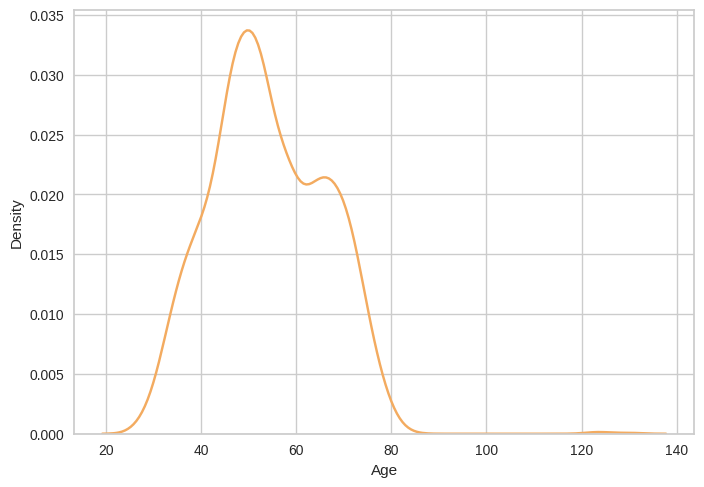

In [33]:
sns.kdeplot(data['Age'], color = "#F3AB60")

<Axes: xlabel='Income', ylabel='Density'>

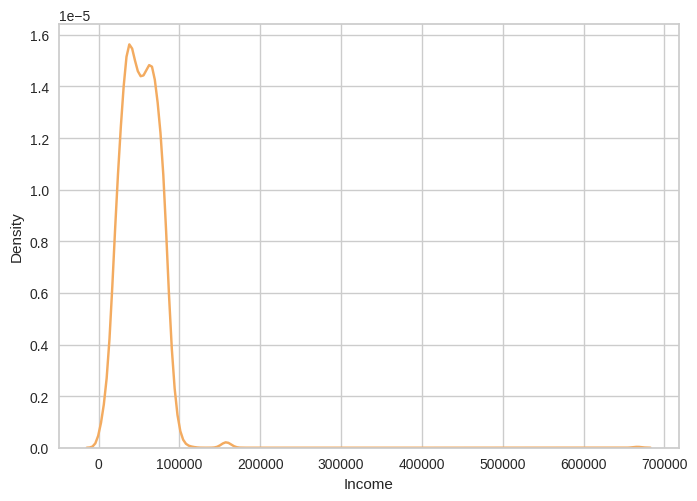

In [34]:
sns.kdeplot(data['Income'],color = "#F3AB60" )

In [64]:
print("Upper age limit",age_upperlimit )
print("Upper income limit",income_upperlimit )

Upper age limit 90.1362651801438
Upper income limit 127766.48133649482


In [65]:
data = data[(data["Age"]<age_upperlimit)]
data = data[(data["Income"]<income_upperlimit)]
print("Total Number of data-points after rmoving outliers are : " ,len(data))

Total Number of data-points after rmoving outliers are :  2205


# Correlation 

<ipython-input-66-4ad3e5ba9130>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


<Axes: >

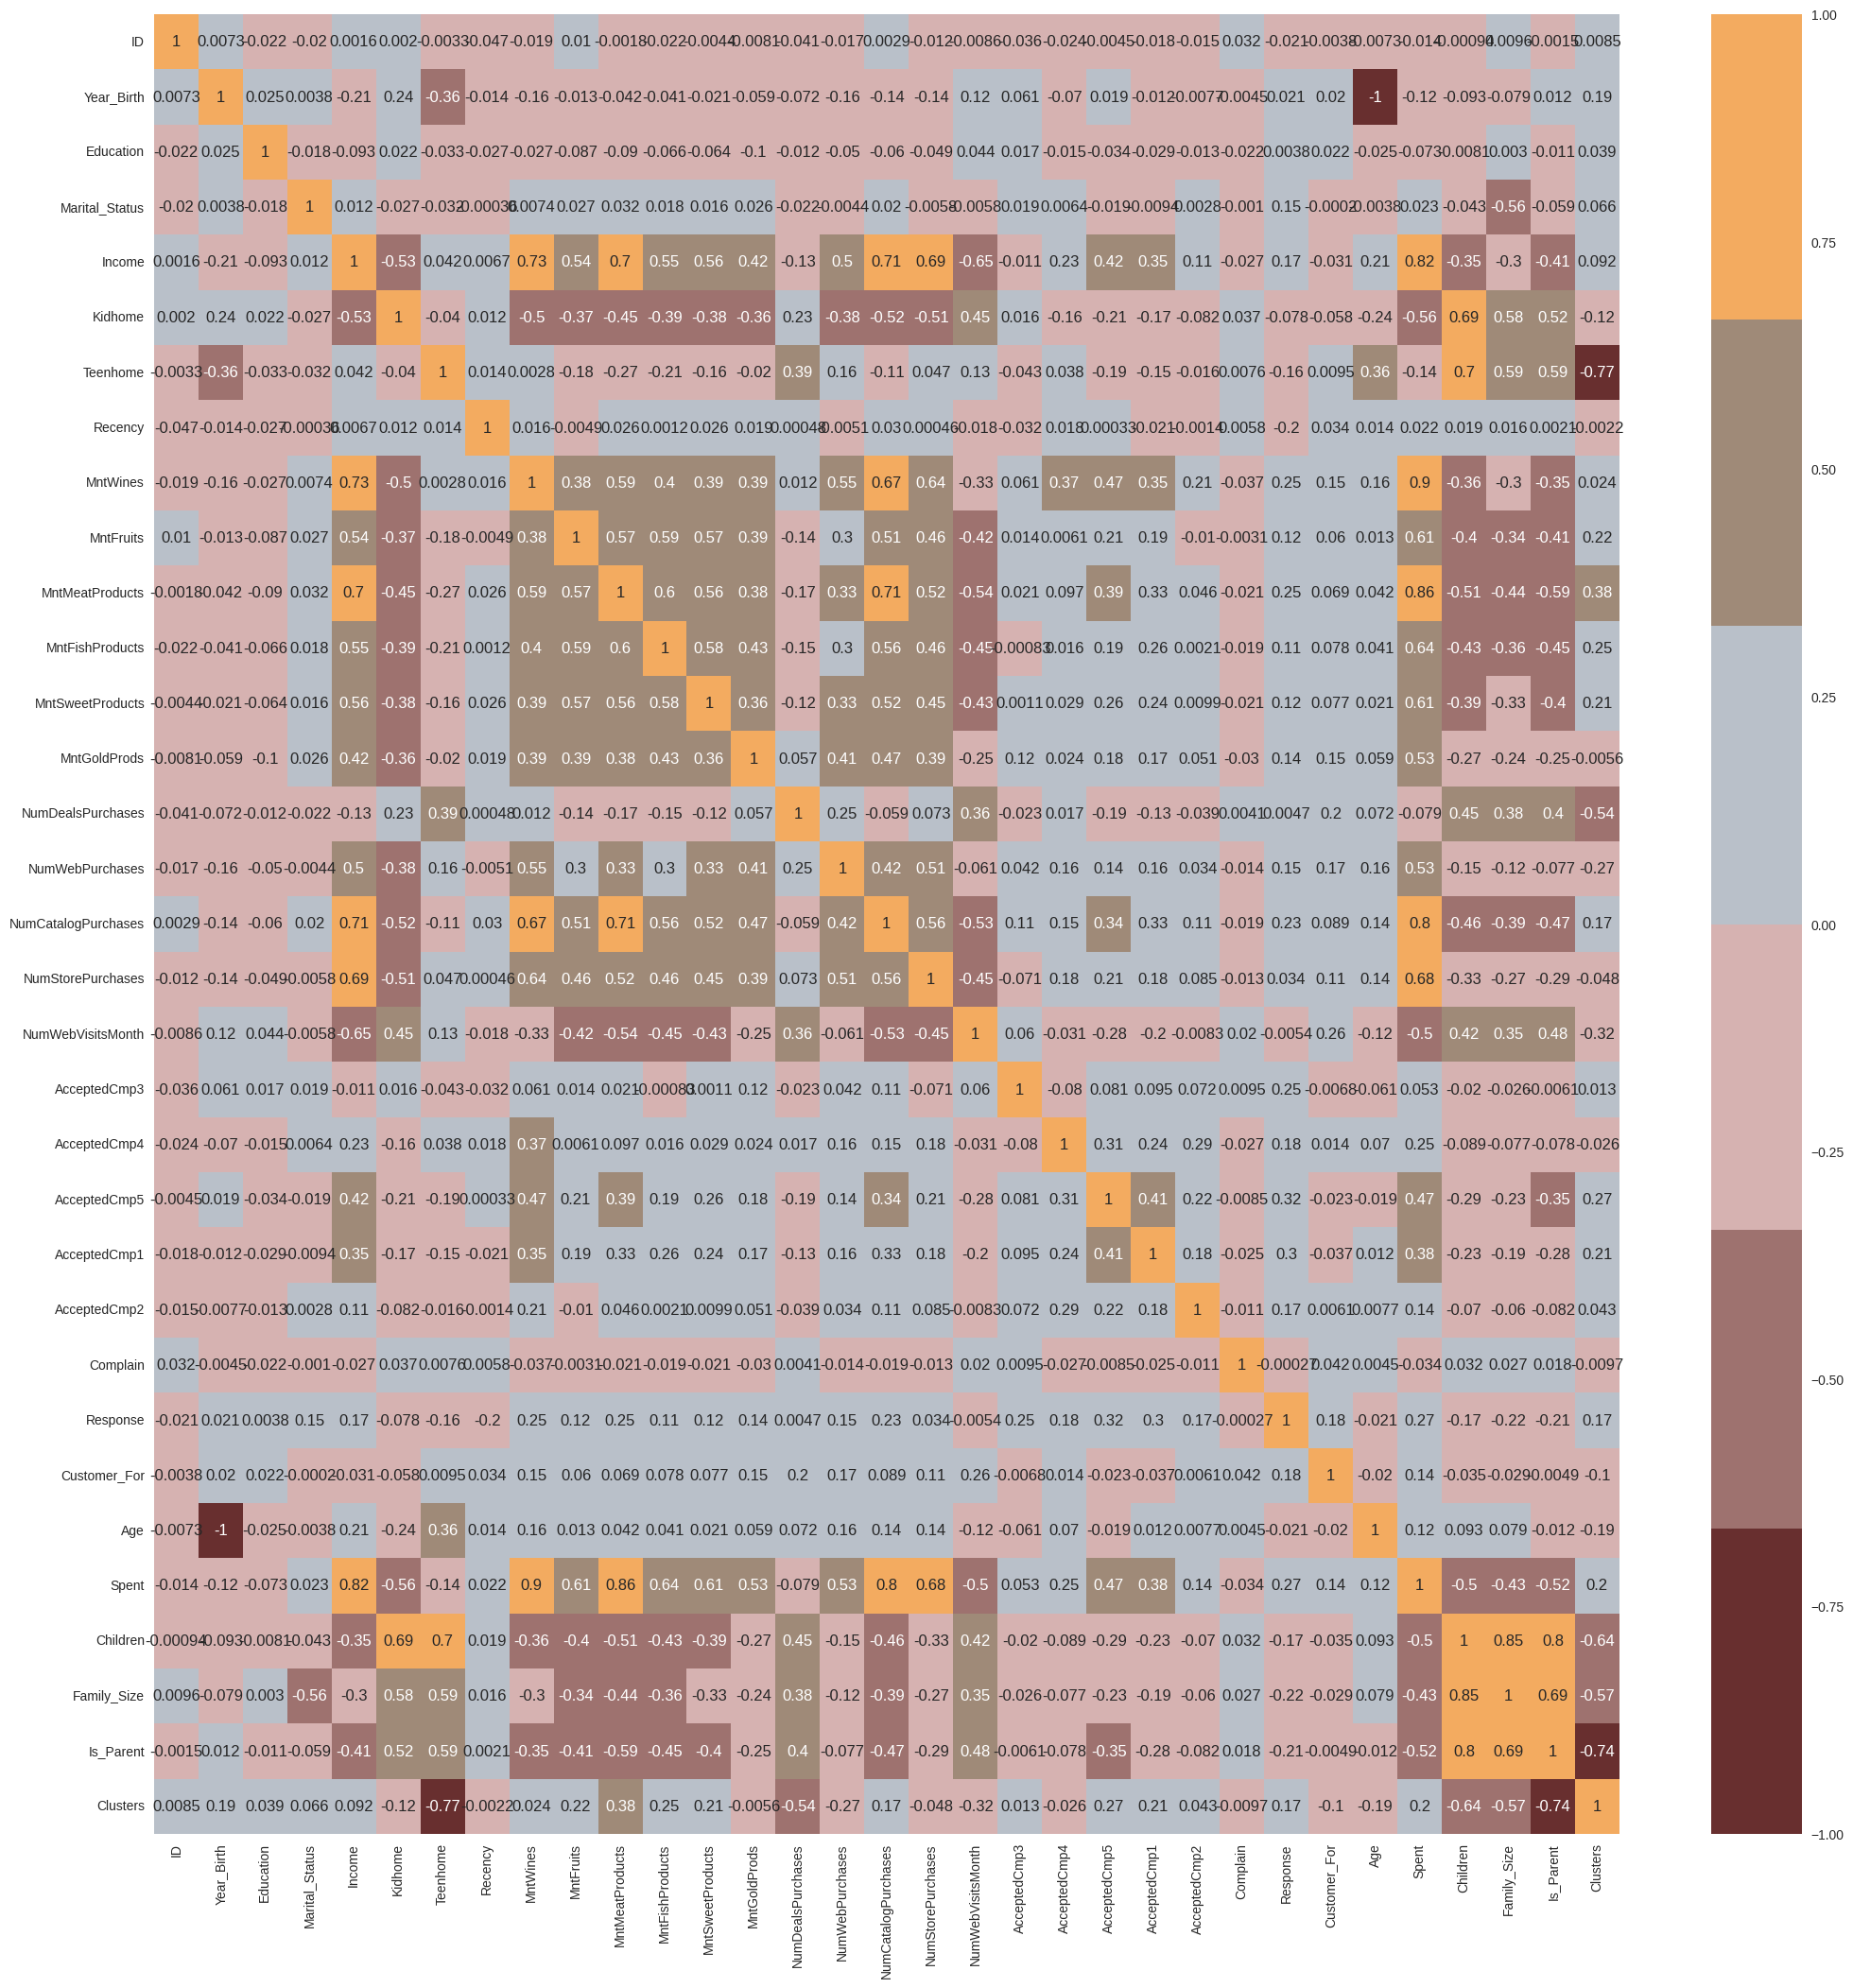

In [66]:
cor = data.corr()
plt.figure(figsize = (25,25))
sns.heatmap(cor, annot = True, cmap = cmap, center = 0)

# Data Preprocessing

### Label Encoding the categorical features. 

In [67]:
#get list of categorical varibales 
a = (data.dtypes == 'object')
object_cols = list(a[a].index)

print("Categorical Variables", object_cols)

Categorical Variables []


In [68]:
 #Label Encoding 
 LE = LabelEncoder()
 for i in object_cols:
  data[i] = data[[i]].apply(LE.fit_transform)



### Creating a subset by dropping features 

In [69]:
df = data.copy()
df = df.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response', 'Dt_Customer', 'Year_Birth'],
             axis = 1)

In [70]:
len(df.columns)

25

### Scaling 

In [71]:
scaler = StandardScaler()
scaler.fit(df)
scaled_ds = pd.DataFrame(scaler.transform(df), columns = df.columns)

In [72]:
scaled_ds.head()

ID  Education  Marital_Status    Income   Kidhome  Teenhome  \
0 -0.018923  -0.892338        1.347625  0.314651 -0.823405 -0.930767   
1 -1.050705  -0.892338        1.347625 -0.254877  1.038757  0.906602   
2 -0.444880  -0.892338       -0.742046  0.965354 -0.823405 -0.930767   
3  0.183737  -0.892338       -0.742046 -1.206087  1.038757 -0.930767   
4 -0.080522   0.571654       -0.742046  0.322136  1.038757 -0.930767   

    Recency  MntWines  MntFruits  MntMeatProducts  ...  NumCatalogPurchases  \
0  0.310830  0.974566   1.548614         1.748400  ...             2.628526   
1 -0.380600 -0.874776  -0.638664        -0.731678  ...            -0.588043   
2 -0.795458  0.355155   0.568110        -0.175957  ...            -0.230646   
3 -0.795458 -0.874776  -0.563241        -0.667380  ...            -0.945440   
4  1.555404 -0.394659   0.417263        -0.217292  ...             0.126750   

   NumStorePurchases  NumWebVisitsMonth  Customer_For       Age     Spent  \
0          -0.562650           0.689203      1.974128  1.017189  1.679323   
1          -1.179732          -0.139645     -1.664957  1.273530 -0.963897   
2           1.288596          -0.554069     -0.172330  0.333612  0.281242   
3          -0.562650           0.274779     -1.923048 -1.289883 -0.920675   
4           0.054432          -0.139645     -0.821859 -1.033542 -0.307248   

   Children  Family_Size  Is_Parent  Clusters  
0 -1.266589    -1.759012   -1.58466  1.401257  
1  1.403420     0.448513    0.63105 -0.366853  
2 -1.266589    -0.655250   -1.58466  1.401257  
3  0.068415     0.448513    0.63105  0.517202  
4  0.068415     0.448513    0.63105 -1.250907  

[5 rows x 25 columns]

# Dimensionality Reduction 

- There are many factors on basis of which final classification will be done. The higher the number of features, the harder it is to work with it. 
- Mnay features are correlated and hence redundant. That is why I'll be performing dimensionality reduction. 
*****
**Dimensionality Reduction** 
- Process of reducing the number of random variables under consideraatino, by obtaining a set of principal variables. 


**Principal Component Analysis (PCA)** is a techqnique for reducing the dimensionality of such datasets, increasing interpretability but at same time minimizing information loss. 

In [73]:
pca = PCA(n_components = 3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds),  columns=(["col1","col2", "col3"]))


In [74]:
PCA_ds.describe()

col1          col2          col3
count  2.205000e+03  2.205000e+03  2.205000e+03
mean   1.095621e-16  6.444832e-17 -1.611208e-17
std    2.927612e+00  1.881889e+00  1.223193e+00
min   -6.243103e+00 -4.152228e+00 -3.706518e+00
25%   -2.467793e+00 -1.578662e+00 -8.334234e-01
50%   -8.672920e-01 -2.857192e-01 -2.289323e-02
75%    2.310002e+00  1.544234e+00  8.067948e-01
max    7.620426e+00  5.942352e+00  6.631730e+00

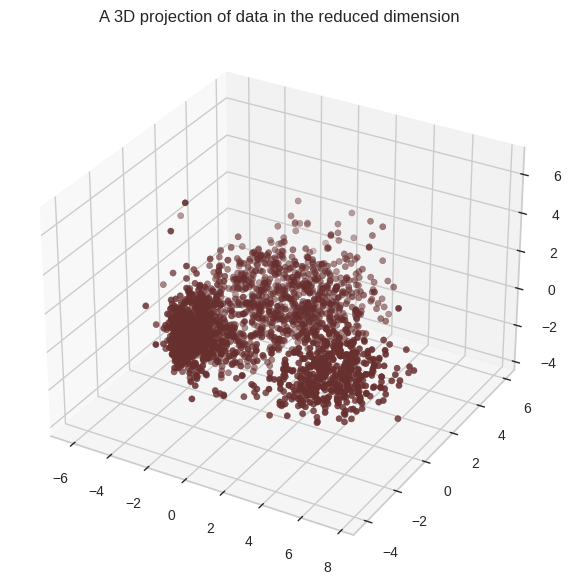

In [75]:
# 3d projection od data in reduced dimension 

x = PCA_ds["col1"]
y = PCA_ds["col2"]
z = PCA_ds["col3"]

fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x, y, z, c = "#682F2F" , marker = "o")
ax.set_title("A 3D projection of data in the reduced dimension")
plt.show()

# Clustering

Using Agglomerative Clusterung, which is hierarchical clustering algorithm that starts with each data point as an individual cluster and then iteratively merges clusters based on a similarity measure. 

### Elbow Method

The Number of clusters to be formed :


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

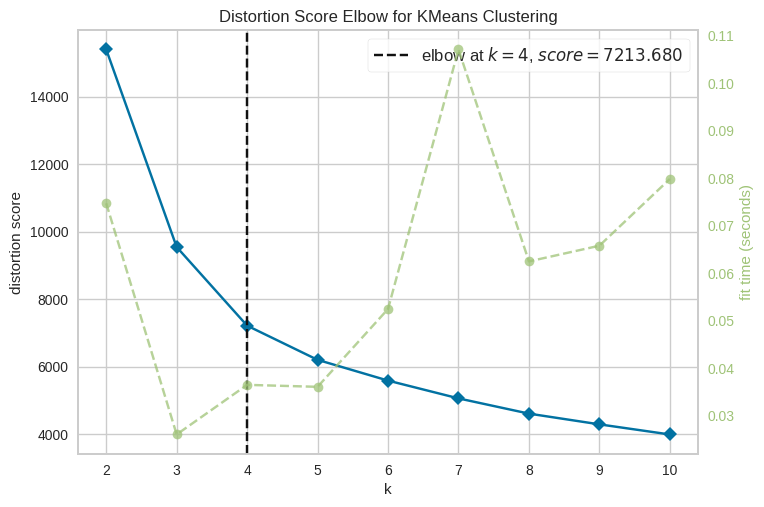

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [76]:
print("The Number of clusters to be formed :")
Elbow_M = KElbowVisualizer(KMeans(), k =10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

**Above analysis indicates that Four clusters are optimal for this data**

In [77]:
AC = AgglomerativeClustering(n_clusters = 4)

ypred = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = ypred

#adding the clusters fearure to the orignal dataframe
data["Clusters"] = ypred

# Plotting the Clusters 

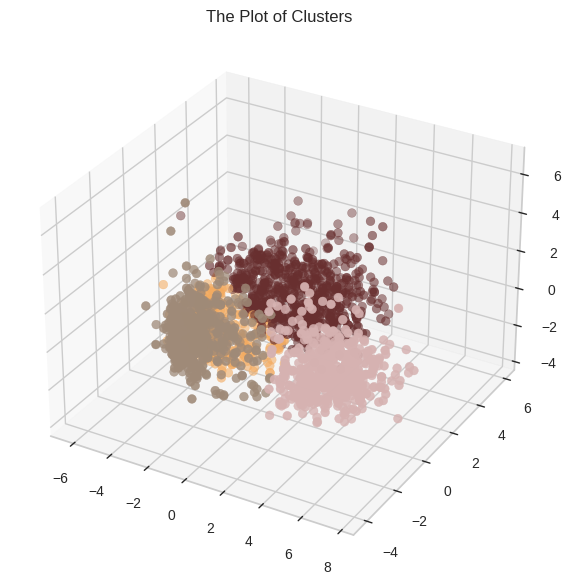

In [78]:
fig = plt.figure(figsize = (10,7))
ax = plt.subplot(111, projection = '3d', label = 'bla')
ax.scatter(x, y, z, s=40, c= PCA_ds['Clusters'], marker = 'o', cmap = cmap )
ax.set_title("The Plot of Clusters")
plt.show()

# Evaluating Models

Since this is an unsupervised clustering, there is no tagged feature to evaluate model. 

We'll stufy the patterns in the clusters formed and determine the nature of clusters pattern. 

For that, we'll look at data in light of clusters via EDA. 

### Count of Clusters 

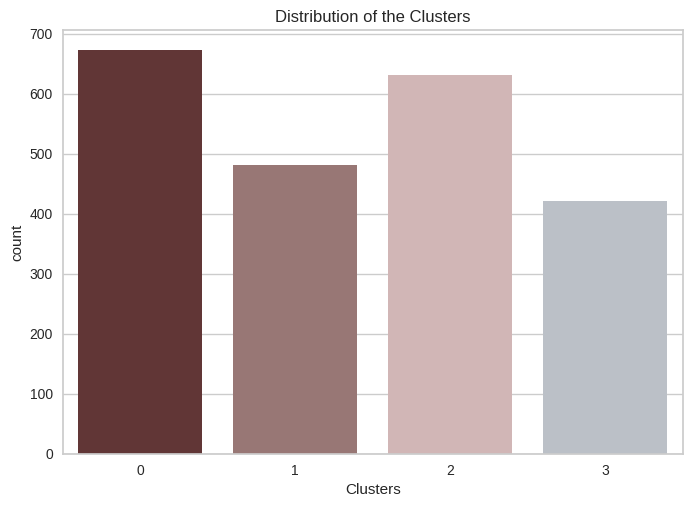

In [79]:
p = sns.countplot(x = data['Clusters'], palette = palette)
p.set_title("Distribution of the Clusters")
plt.show()

**Clusters are fairly distributed.**

### Clusters based on Income and Spending

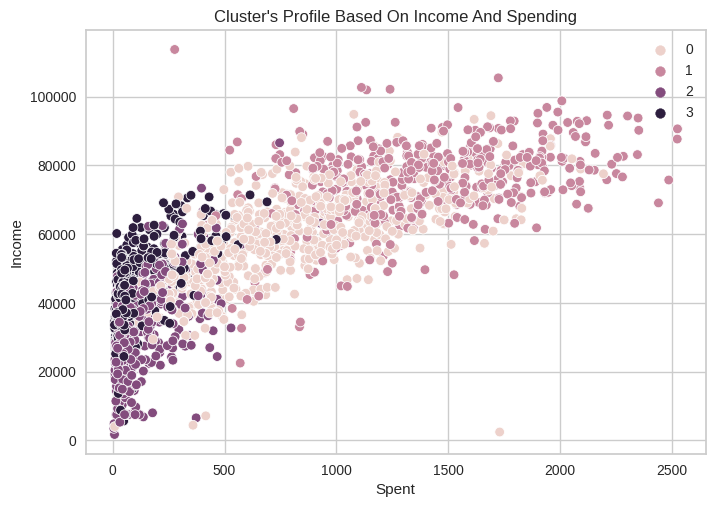

In [80]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

**Income vs Spending plot shows the clusters pattern**
- Group 0 : high spending and average income 
- Group 1 : high spending and high income 
- Group 2 : low spending and low income 
- group 3 : medium income and low spending

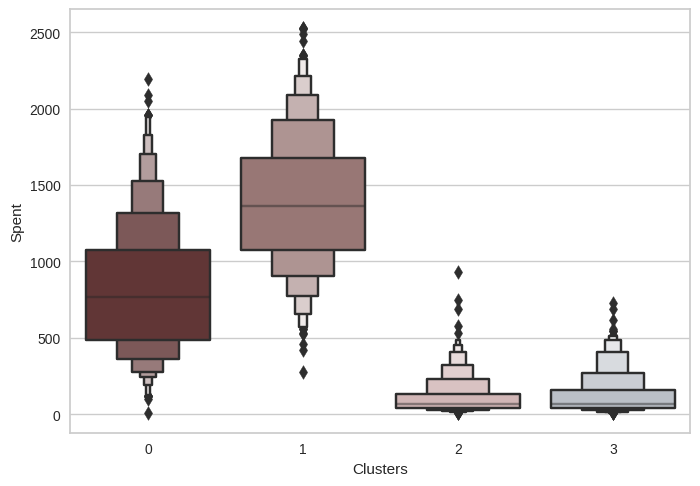

In [97]:
plt.figure()
p =sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette = palette)
plt.show()

**Cluster 1 is our biggest set of customers, followed by 0.**

### Distribution of clusters as per Products. 
Products : Wines, Fruits, Meat, Fish, Sweets and Gold. 

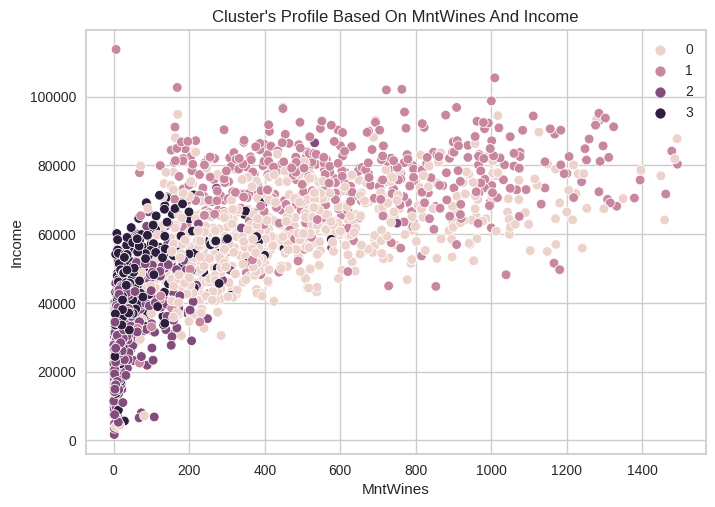

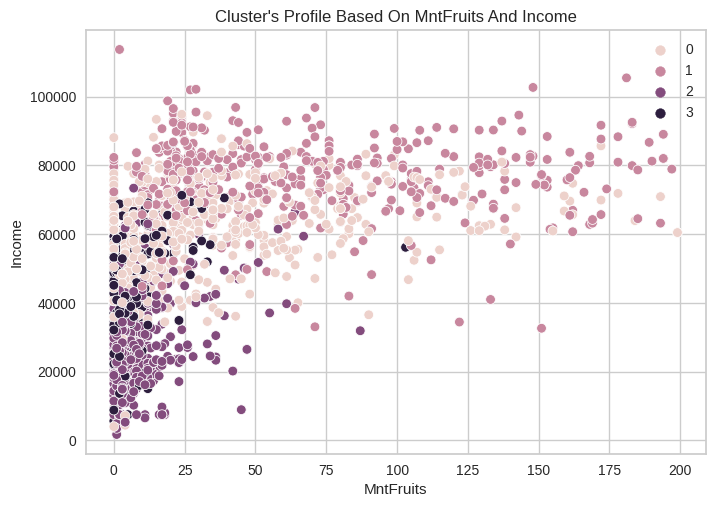

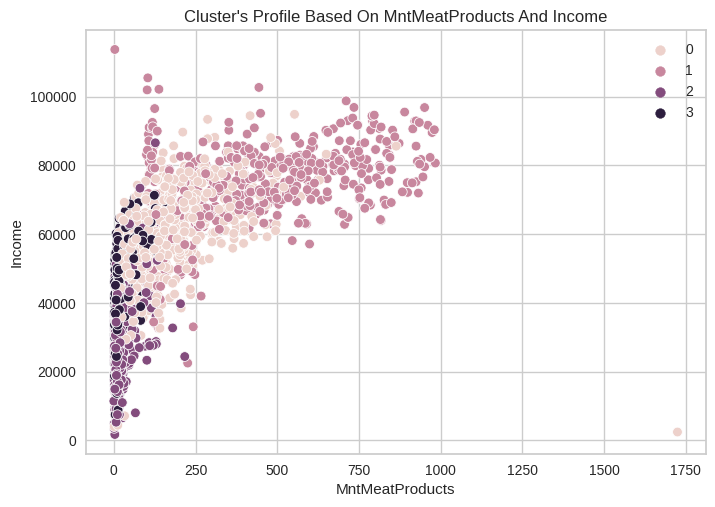

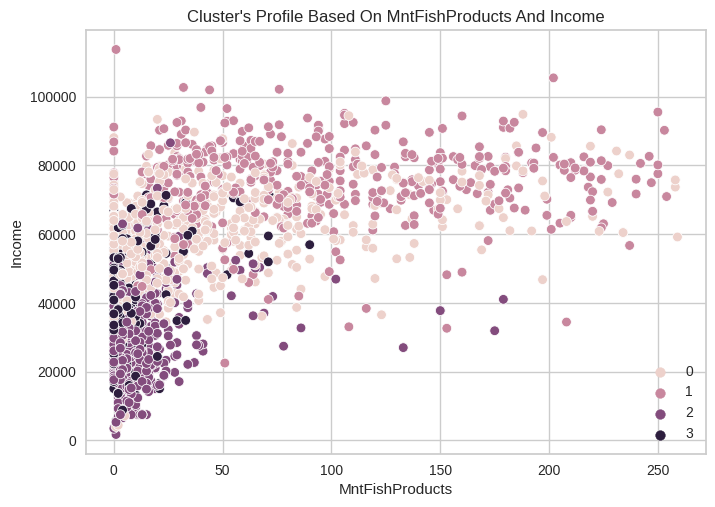

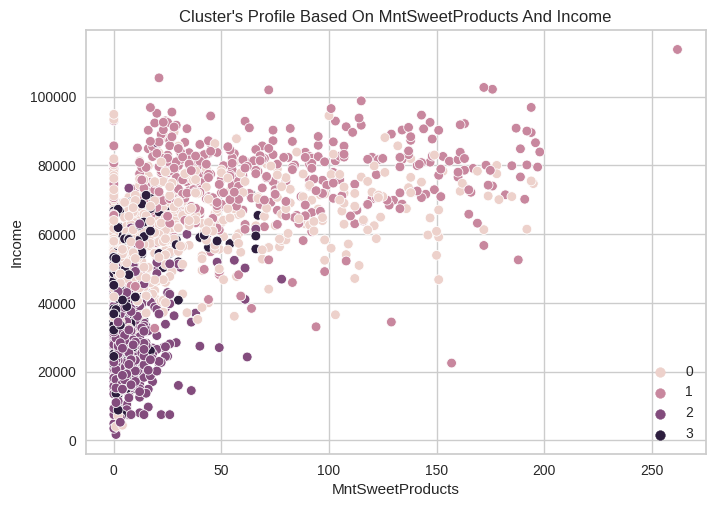

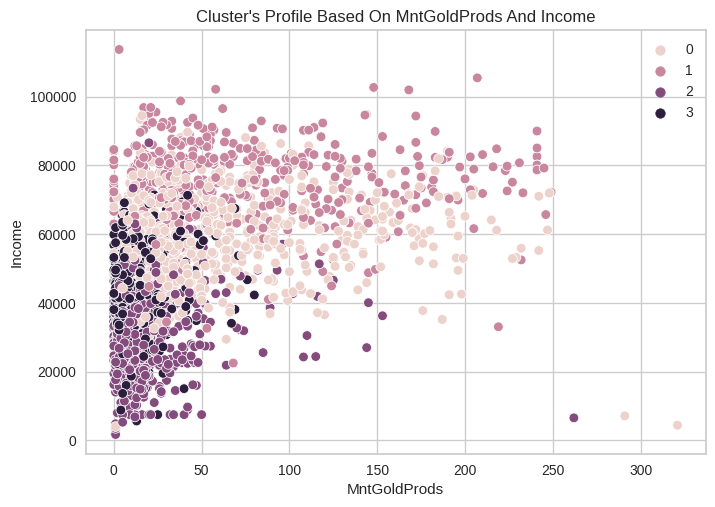

In [92]:
cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
for i in cols:
  pl = sns.scatterplot(data = data,x=data[i], y=data["Income"],hue=data["Clusters"])
  pl.set_title(f"Cluster's Profile Based On {i} And Income")
  plt.legend()
  plt.show()

In every category of products, `Cluster 1` spends the most. 




In [81]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Customer_For', 'Age', 'Spent',
       'Children', 'Family_Size', 'Is_Parent', 'Clusters'],
      dtype='object')

## Distribution of Clusters based on Campaigns

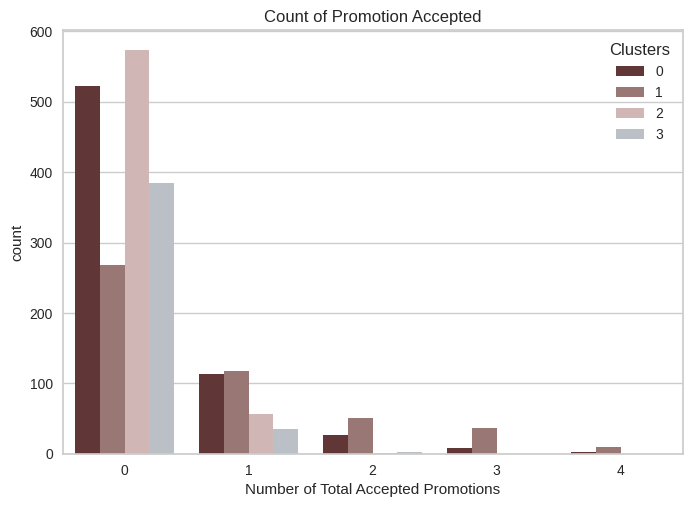

In [98]:
# creating a feature to get a sum of accepted promotions 
data["Total_Promos"] = data["AcceptedCmp1"] + data["AcceptedCmp2"] + data["AcceptedCmp3"] + data["AcceptedCmp4"] + data["AcceptedCmp5"]

plt.figure()
p = sns.countplot( x = data['Total_Promos'], hue = data['Clusters'], palette = palette)
p.set_title("Count of Promotion Accepted")
p.set_xlabel("Number of Total Accepted Promotions")
plt.show()

Very few participants to Campaigns.<br>
Moreover, no one take part in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales. 


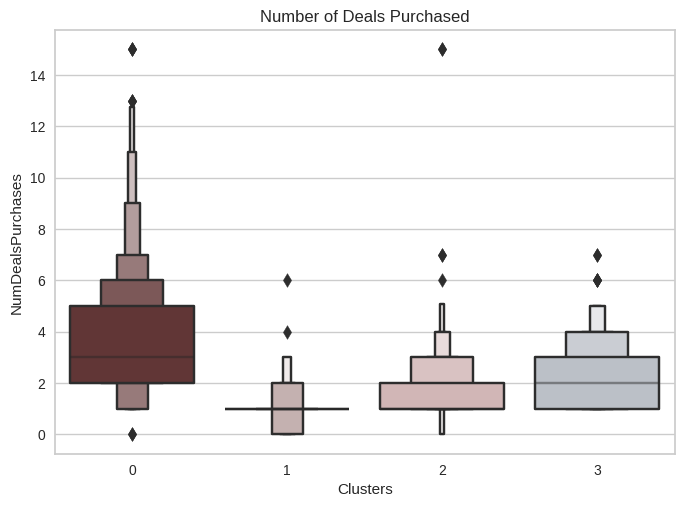

In [100]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= palette)
pl.set_title("Number of Deals Purchased")
plt.show()

Deals offered did well. It has best outcome with cluster 0 and cluster 3. However, customers in cluster 1 are not much into deals. 

## Puchasing styles 

<Figure size 800x800 with 0 Axes>

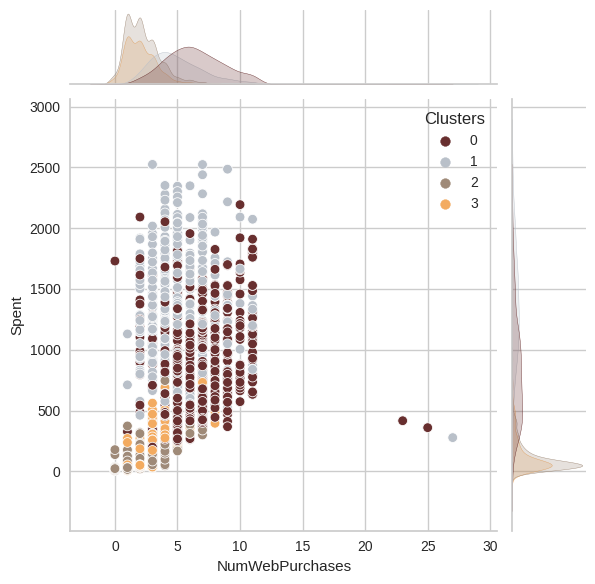

<Figure size 800x800 with 0 Axes>

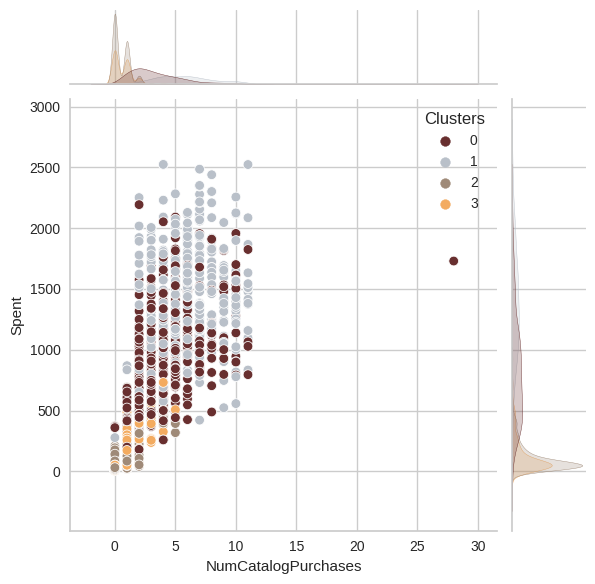

<Figure size 800x800 with 0 Axes>

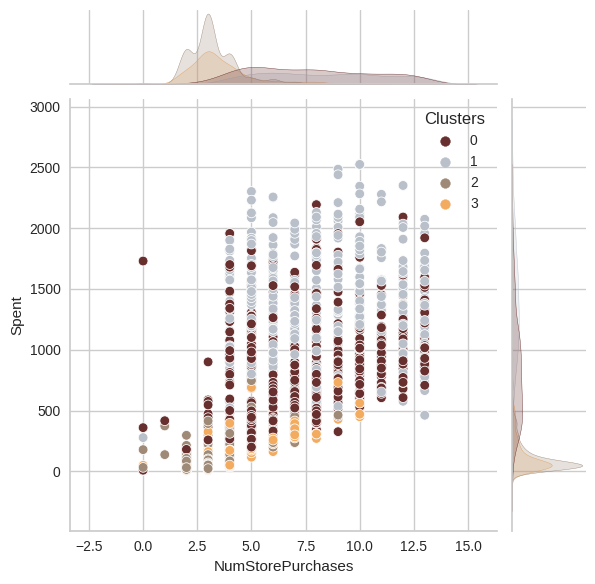

<Figure size 800x800 with 0 Axes>

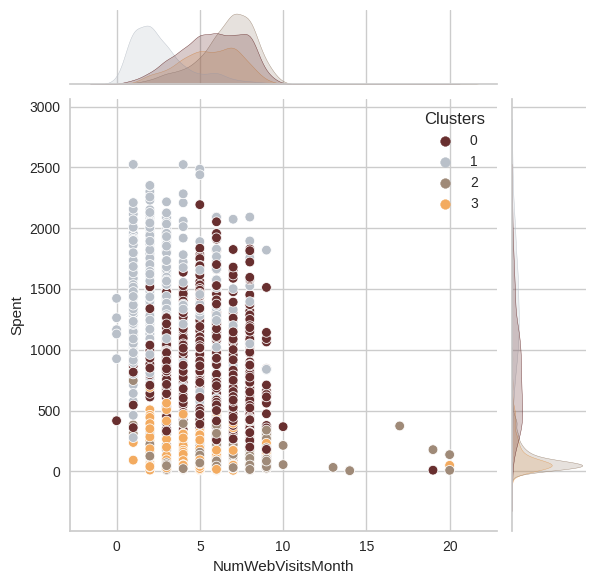

In [104]:
places =["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases",  "NumWebVisitsMonth"] 

for i in places:
  plt.figure(figsize = (8,8))
  sns.jointplot(x = data[i], y = data['Spent'], hue = data['Clusters'], palette = palette)
  plt.show()

# Profiling

Let's see who all are there in these clusters. For that, we will be profiling the clusters formed and come to a conclusion about who is our star customer and who needs more attention from retails store's marketing team. 

To decide that, we'll plot features that are indicative of customer's personal traits in light of clusters they are in. 

<Figure size 700x700 with 0 Axes>

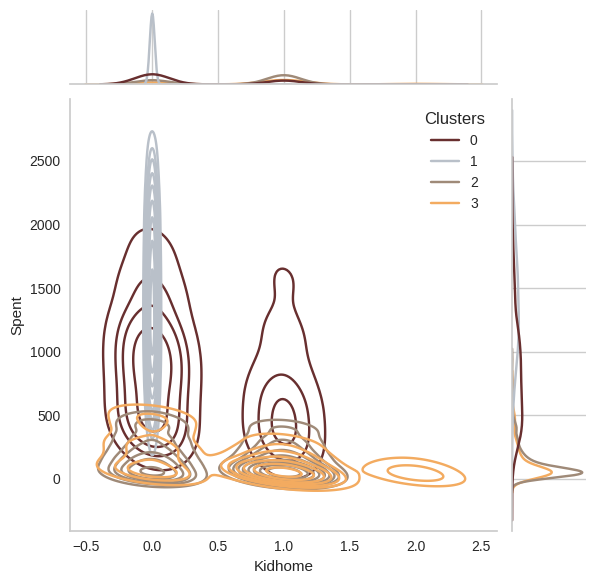

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 700x700 with 0 Axes>

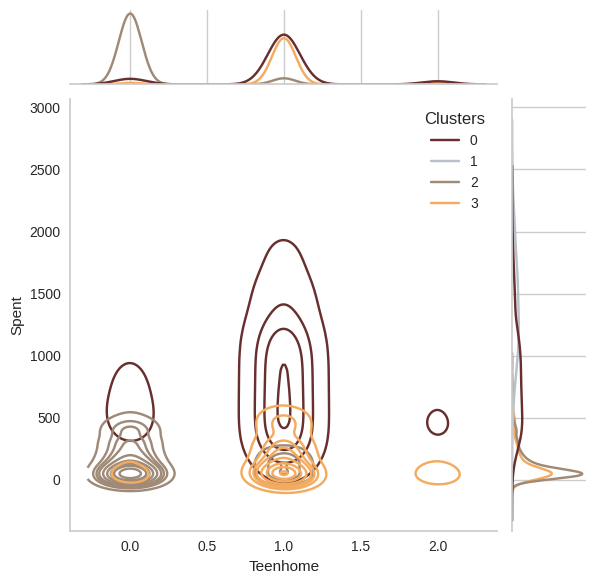

<Figure size 700x700 with 0 Axes>

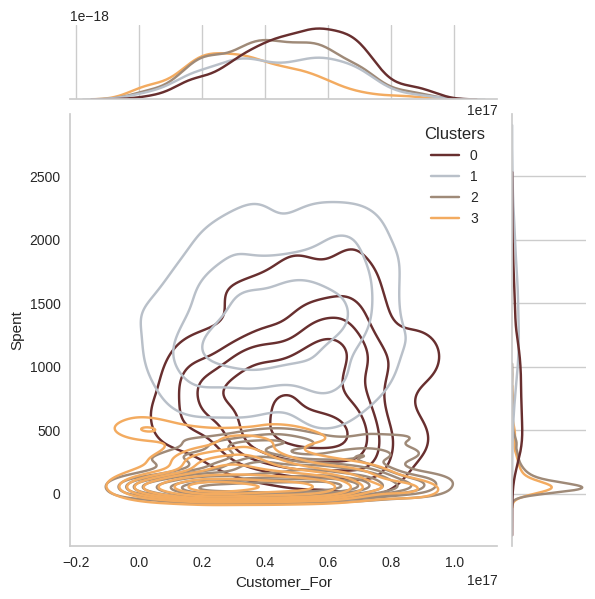

<Figure size 700x700 with 0 Axes>

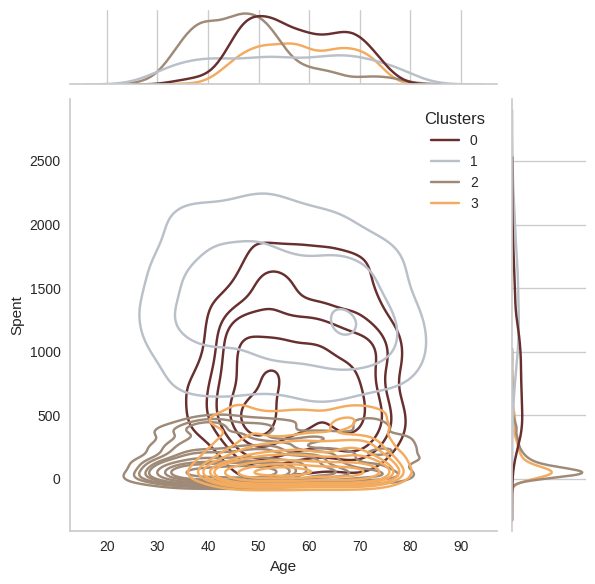

<Figure size 700x700 with 0 Axes>

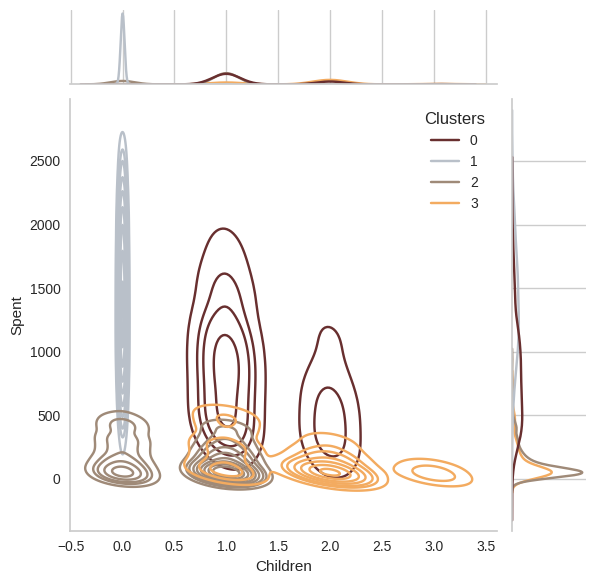

<Figure size 700x700 with 0 Axes>

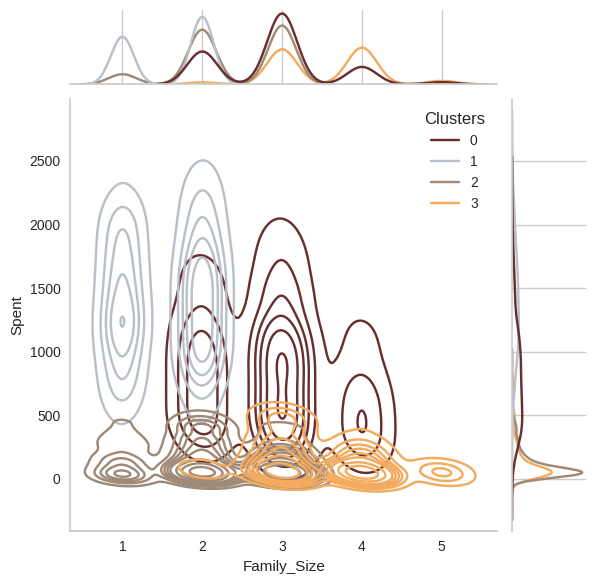

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 700x700 with 0 Axes>

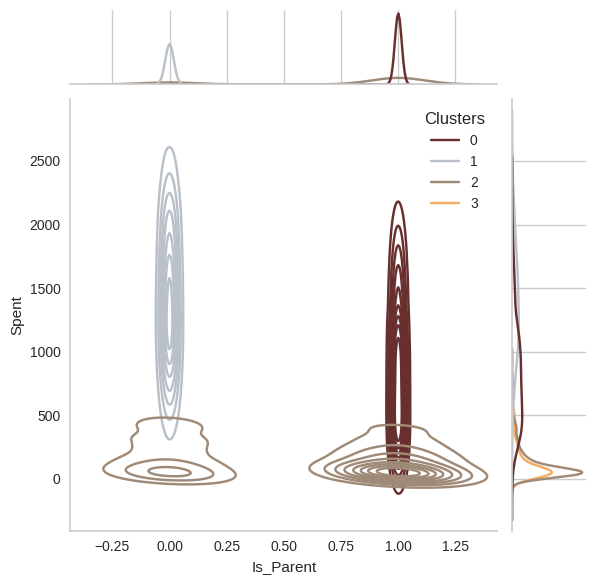

<Figure size 700x700 with 0 Axes>

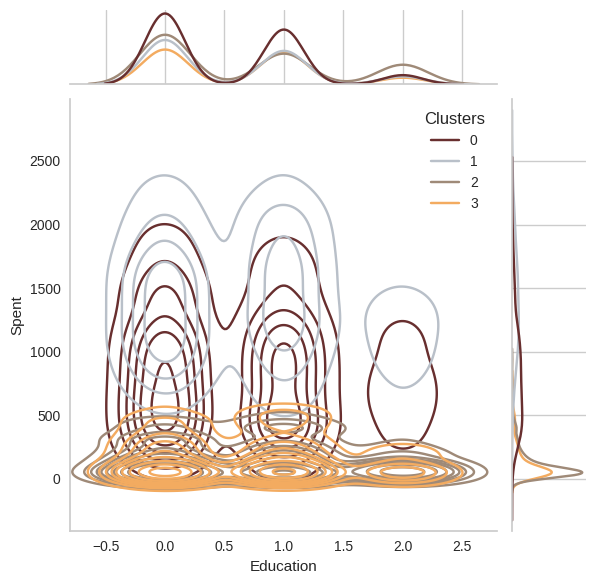

<Figure size 700x700 with 0 Axes>

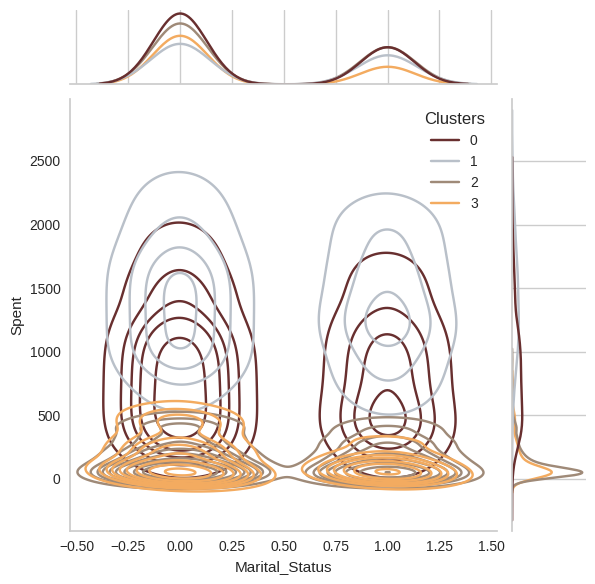

In [108]:
columns = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Marital_Status"]

for i in columns:
  plt.figure(figsize = (7,7))
  sns.jointplot(x = data[i], y = data['Spent'], hue = data['Clusters'], kind = 'kde', palette = palette)
  plt.grid(False)
  plt.show()


#Conclusion 

#### Cluster Number : 0
- they are definitely a parent 
- at the max have 4 members in the family and atleast 2 
- single parents are subset of this group 
- most have teenager at home 
- relatively older. 

#### Cluster Number : 1
- not parents 
- at max only 2 members in family 
- Slight majority of couples over single people 
- span all ages 
- a high income group 

#### Cluster Number : 2
- Majority of these are parents 
- at max are 3 members in family 
- majority have one kid 
- relatively younger 

#### Cluster Numver : 3 
- Definitely a parent 
- upto 5 members  in family and least 2 
- majority of them have teenager at home 
- relatively older 
- a lower income group 